# Project 3 : Food Inspection 

## EDA
### Goal 

- Figure out which features are important for the model (i.e feature decides whether the restaurant will pass or fail the inspection)

- Main Features:

```
- lat/lon

- Number of violations in the past

- Rating

- Price

- Total review
```



In [3]:
# load packages
import plotly.figure_factory as ff
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


import pandas as pd
import numpy as np

In [4]:
init_notebook_mode(connected=True)

In [5]:
#df = pd.read_csv('data/Food_Inspections.csv')
df = pd.read_csv('data/input.csv')
df.columns = map(str.lower, df.columns)

# fill Nan with 0
df = df.fillna(0)
df['results'] = df['results'].replace('Pass w/ Conditions', 'Pass')
print(len(df))
print(df.info())
print(df.columns)
df.head(3)

23245
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23245 entries, 0 to 23244
Data columns (total 33 columns):
unnamed: 0                    23245 non-null int64
dba name_x                    23245 non-null object
aka name                      23245 non-null object
facility type                 23245 non-null object
risk                          23245 non-null object
address                       23245 non-null object
city                          23245 non-null object
state                         23245 non-null object
zip_x                         23245 non-null int64
inspection date               23245 non-null object
inspection type               23245 non-null object
results                       23245 non-null object
violations                    23245 non-null object
latitude                      23245 non-null float64
longitude                     23245 non-null float64
location                      23245 non-null object
historical wards 2003-2015    23245 non-null float64


,unnamed: 0,dba name_x,aka name,facility type,risk,address,city,state,zip_x,inspection date,...,conditional approval,application type,business activity,license code,legal name,full address,unnamed: 0.1,price_level,rating,user_ratings_total
0,0,PASTA AND BURGER SALON,PASTA AND BURGER SALON,restaurant,Risk 1 (High),1621 W 43RD ST,CHICAGO,IL,60609,05/25/2017,...,N,ISSUE,Sale of Food Prepared Onsite With Dining Area,1006,VISITA MARAVATIO INC.,"PASTA AND BURGER SALON,1621 W 43RD ST ,CHICAGO...",483,1.0,4.7,58.0
1,1,Q'BOLE TORTAS INC,Q'BOLE TORTAS,restaurant,Risk 1 (High),1621 W 43RD ST,CHICAGO,IL,60609,02/11/2016,...,N,ISSUE,Sale of Food Prepared Onsite With Dining Area,1006,VISITA MARAVATIO INC.,"Q'BOLE TORTAS INC,1621 W 43RD ST ,CHICAGO,IL,6...",1175,0.0,0.0,0.0
2,2,Q'BOLE TORTAS INC,Q'BOLE TORTAS,restaurant,Risk 1 (High),1621 W 43RD ST,CHICAGO,IL,60609,08/13/2015,...,N,ISSUE,Sale of Food Prepared Onsite With Dining Area,1006,VISITA MARAVATIO INC.,"Q'BOLE TORTAS INC,1621 W 43RD ST ,CHICAGO,IL,6...",1175,0.0,0.0,0.0


In [5]:
# interactive plotly table of data
table = ff.create_table(df.head(3))
iplot(table)

In [6]:
#[ 'number violations', 'price_level', 'rating', 'user_ratings_total'] 


In [5]:
# food 3d using Pandas

data = []
clusters = []
#colors = ['rgb(77,175,74)' ,'rgb(55,126,184)', 'rgb(228,26,28)'] # set our dot colors
colors = ['rgb(77,175,74)' , 'rgb(228,26,28)'] # set our dot colors
for i in range(len(df['results'].unique())): # allows us to split our data into three distinct groups
    result = df['results'].unique()[i]
    color = colors[i]
    x = df[ df['results'] == result ]['number violations']
    y = df[ df['results'] == result ]['rating']
    z = df[ df['results'] == result ]['user_ratings_total']
    
    trace = dict(  # trace is how we "trace" or draw our data on the canvas
        name = result,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )

layout = dict( # we modify our canvas here, including initial layout and styles
    width=800,
    height=550,
    autosize=False,
    title='Food Inspection dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title='Number of violations',  # set titles, very important
            titlefont=dict(
            family='Courier New',
            size=14,
            color='#2f2f2f'),  # we can use hex, rgba, or other color variants
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title= 'Rating', # set titles, very important
            titlefont=dict(
            family='Courier New',
            size=14,
            color='#4f4f4f'),
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title= 'Total User Ratings',   # set titles, very important
            titlefont=dict(
            family='Courier New',
            size=14,
            color='#7f7f7f'),
        ),
        aspectratio = dict( x=1, y=1, z=1 ), # we can compress large dimensions this way
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout) # this finally compiles our figure

# run locally in notebook
iplot(fig)

# run on site, may need an account and access key, depending on usage
# url = py.plot(fig, filename='pandas-3d-iris', validate=False)

In [7]:
# food 3d using Pandas

data = []
clusters = []
colors = ['rgb(77,175,74)' ,'rgb(55,126,184)', 'rgb(228,26,28)'] # set our dot colors

for i in range(len(df['results'].unique())): # allows us to split our data into three distinct groups
    result = df['results'].unique()[i]
    color = colors[i]
    x = df[ df['results'] == result ]['price_level']
    y = df[ df['results'] == result ]['rating']
    z = df[ df['results'] == result ]['user_ratings_total']
    
    trace = dict(  # trace is how we "trace" or draw our data on the canvas
        name = result,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )

layout = dict( # we modify our canvas here, including initial layout and styles
    width=800,
    height=550,
    autosize=False,
    title='Food Inspection dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title='Price level',  # set titles, very important
            titlefont=dict(
            family='Courier New',
            size=14,
            color='#2f2f2f'),  # we can use hex, rgba, or other color variants
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title= 'Rating', # set titles, very important
            titlefont=dict(
            family='Courier New',
            size=14,
            color='#4f4f4f'),
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title= 'Total User Ratings',   # set titles, very important
            titlefont=dict(
            family='Courier New',
            size=14,
            color='#7f7f7f'),
        ),
        aspectratio = dict( x=1, y=1, z=1 ), # we can compress large dimensions this way
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout) # this finally compiles our figure

# run locally in notebook
iplot(fig)

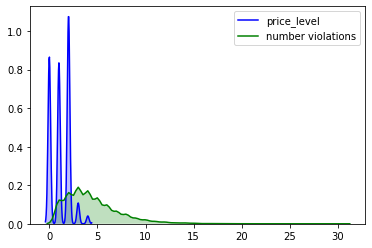

In [10]:
import seaborn as sns


# plot of 2 variables
#p1=sns.kdeplot(df['rating'], shade=True, color="r")
p1=sns.kdeplot(df['price_level'], shade=True, color="b")
p1=sns.kdeplot(df['number violations'], shade=True, color="g")
#sns.plt.show()

In [14]:
sns.kdeplot(df.query('results == Fail')[['results','price_level']])

UndefinedVariableError: name 'Fail' is not defined

ValueError: could not convert string to float: 'Fail'

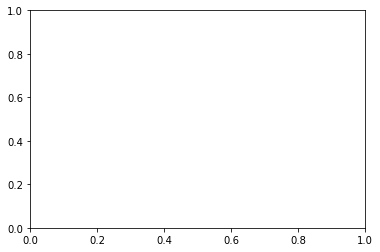

In [21]:
sns.kdeplot(df[df['results'] == 'Fail'].loc[:, ['results','price_level']])